In [76]:
ind_photos

,Unnamed: 0,0
0,0,True
1,1,False
2,2,False
3,3,True
4,4,True
5,5,True
6,6,False
7,7,True
8,8,False
9,9,True


In [198]:
import pandas as pd 
#photos = pd.read_csv("photos.csv",encoding='latin-1')
photos_treated = pd.read_pickle("photos_treated.csv")
ind_photos = pd.read_csv("ind_photos.csv")
ind_depeches = pd.read_csv("ind_depeches.csv")
depeches = pd.read_csv("depeches.csv")

In [199]:

import spacy
import pandas as pd
import numpy as np
import neuralcoref
import ast
import random
from tqdm import tqdm_notebook
import urllib.request
from PIL import Image


scoring = pd.read_csv('scoring.csv', delimiter = ";")
dict_val = {}

for i in range(48):
    dict_val[scoring['function'][i]] = scoring['score_norm'][i]

nlp=spacy.load("en_core_web_md")
neuralcoref.add_to_pipe(nlp,greedyness=0.5)

In [200]:


def author_del_photos(text):
    text_s = text
    while(text_s[-7:] != ' / AFP ' and len(text_s) > 1): 
        text_s = text_s[:-1]
    if(len(text_s) <= 1):
        return(text)
    return(text_s[:-7])


def transfo_event(ev):
    res=ev
    return res[1:-1].replace("'","").split(', ')

df_depeche=pd.read_csv('depeches_clean.csv',index_col='Unnamed: 0')
df_depeche.event=df_depeche.event.apply(transfo_event)

df2=pd.read_csv('photos_clean.csv',index_col='Unnamed: 0')
df2.event=df2.event.apply(transfo_event)

df2.caption = df2.caption.apply(author_del_photos)

/Users/ya/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (11,16,24,25,30,31,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [79]:
df2

,Unnamed: 0.1,Uno,caption,city,contributor,country,country_only,country_out,created,creator,...,revision,rules,signal,slug,source,status,title,topic,urgency,url_extracted
0,0,AFP_1P577M,Portugal's Prime Minister Antonio Costa (2ndL)...,Brussels,NaN,BEL,['ALL'],NaN,2020-02-20T16:22:04Z,LUDOVIC MARIN,...,1,NaN,NaN,"['belgium', 'eu', 'politics', 'summit']",AFP,Usable,BELGIUM-EU-POLITICS-SUMMIT,"['AFP-FORUM', 'AFP-PH-EUR', 'AFP-PH-AMN', 'AFP...",5,https://api.afp.com/objects/api/medias?id=a1kk...
12,12,AFP_1P57CA,President of the European Commission Ursula vo...,Brussels,NaN,BEL,['ALL'],NaN,2020-02-20T16:21:34Z,LUDOVIC MARIN,...,1,NaN,NaN,"['belgium', 'eu', 'politics', 'summit']",AFP,Usable,BELGIUM-EU-POLITICS-SUMMIT,"['AFP-FORUM', 'AFP-PH-EUR', 'AFP-PH-AMN', 'AFP...",5,https://api.afp.com/objects/api/medias?id=a1kk...
13,13,AFP_1P57CD,Denmark's Prime Minister Mette Frederiksen (L)...,Brussels,NaN,BEL,['ALL'],NaN,2020-02-20T16:21:20Z,LUDOVIC MARIN,...,1,NaN,NaN,"['belgium', 'eu', 'politics', 'summit']",AFP,Usable,BELGIUM-EU-POLITICS-SUMMIT,"['AFP-FORUM', 'AFP-PH-EUR', 'AFP-PH-AMN', 'AFP...",5,https://api.afp.com/objects/api/medias?id=a1kk...
14,14,AFP_1P57C6,Police officers put up a vision barries in fro...,Hanau,NaN,DEU,['ALL'],NaN,2020-02-20T16:20:21Z,PATRICK HERTZOG,...,1,NaN,NaN,"['germany', 'attack', 'racism']",AFP,Usable,GERMANY-ATTACK-RACISM,"['AFP-FORUM', 'AFP-PH-EUR', 'AFP-PH-AMN', 'AFP...",5,https://api.afp.com/objects/api/medias?id=a1kk...
20,20,AFP_1P57CE,Denmark's Prime Minister Mette Frederiksen att...,Brussels,NaN,BEL,['ALL'],NaN,2020-02-20T16:19:38Z,LUDOVIC MARIN,...,1,NaN,NaN,"['belgium', 'eu', 'politics', 'summit']",AFP,Usable,BELGIUM-EU-POLITICS-SUMMIT,"['AFP-FORUM', 'AFP-PH-EUR', 'AFP-PH-AMN', 'AFP...",5,https://api.afp.com/objects/api/medias?id=a1kk...
22,22,AFP_1P576Z,Austria's Chancellor Sebastian Kurz (R) and Es...,Brussels,NaN,BEL,['ALL'],NaN,2020-02-20T16:19:06Z,LUDOVIC MARIN,...,1,NaN,NaN,"['belgium', 'eu', 'politics', 'summit']",AFP,Usable,BELGIUM-EU-POLITICS-SUMMIT,"['AFP-FORUM', 'AFP-PH-EUR', 'AFP-PH-AMN', 'AFP...",5,https://api.afp.com/objects/api/medias?id=a1kk...
27,27,AFP_1P5770,Austria's Chancellor Sebastian Kurz (R) and Es...,Brussels,NaN,BEL,['ALL'],NaN,2020-02-20T16:18:50Z,LUDOVIC MARIN,...,1,NaN,NaN,"['belgium', 'eu', 'politics', 'summit']",AFP,Usable,BELGIUM-EU-POLITICS-SUMMIT,"['AFP-FORUM', 'AFP-PH-EUR', 'AFP-PH-AMN', 'AFP...",5,https://api.afp.com/objects/api/medias?id=a1kk...
33,33,AFP_1P55WW,TOPSHOT - Harvey Weinstein arrives at Manhatta...,New York,NaN,USA,['ALL'],NaN,2020-02-20T14:45:32Z,TIMOTHY A. CLARY,...,3,NaN,NaN,"['topshot', 'us', 'entertainment', 'assault', ...",AFP,Usable,TOPSHOT - Harvey Weinstein arrives at Manhatta...,"['AFP-FORUM', 'AFP-PH-EUR', 'AFP-PH-AMN', 'AFP...",1,https://api.afp.com/objects/api/medias?id=a1kk...
34,34,AFP_1P55NU,"TOPSHOT - (From Bottom) Estonian Rene Zahkna, ...",Antholz,NaN,ITA,['ALL'],NaN,2020-02-20T14:41:45Z,TIZIANA FABI,...,3,NaN,NaN,"['topshot', 'biathlon', 'wc', 'ita', 'single',...",AFP,Usable,"TOPSHOT - (From Bottom) Estonian Rene Zahkna, ...","['AFP-FORUM', 'AFP-PH-EUR', 'AFP-PH-AMN', 'AFP...",1,https://api.afp.com/objects/api/medias?id=a1kk...
36,36,AFP_1P55NZ,TOPSHOT - Harvey Weinstein arrives at Manhatta...,New York,NaN,USA,['ALL'],NaN,2020-02-20T14:47:50Z,ANGELA WEISS,...,3,NaN,NaN,"['topshot', 'us', 'entertainment', 'assault', ...",AFP,Usable,TOPSHOT - Harvey Weinstein arrives at Manhatta...,"['AFP-FORUM', 'AFP-PH-EUR', 'AFP-PH-AMN', 'AFP...",1,https://api.afp.com/objects/api/medias?id=a1kk...


In [201]:
def read_scores(csv):
    file=pd.read_csv(csv)
    res=[]
    for string in file.scores:
        res.append(ast.literal_eval(string))
    return res


#liste_score2=read_scores("event_score_2.csv")
liste_score4=read_scores("event_score_4.csv")

#liste_score2_d=read_scores("depeche_score_2.csv")
liste_score4_d=read_scores("depeche_score_4.csv")

In [202]:

def ev_match(ev_list1,ev_list2):
    for ev in ev_list1:
        if ev in ev_list2:
            return True
    return False

# Score naif 

In [203]:
def score_sim(score_doc,liste_scores,k):
    res=0
    score_image=liste_scores[k]
    if len(score_image.values())==0 or len(score_doc.values())==0:
        return 0
    max_doc=max(score_doc.values())
    max_im=max(score_image.values())
    for i in score_doc.keys():
        if i in score_image.keys():
            if max_doc==0 or max_im==0:
                return 0
            res += score_doc[i]/max_doc +score_image[i]/max_im
    return res

def score_sim1(score_doc,liste_scores,k):
    res=5
    score_image=liste_scores[k]
    if len(score_image.values())==0 or len(score_doc.values())==0:
        return 5
    max_doc=max(score_doc.values())
    max_im=max(score_image.values())
    for i in score_doc.keys():
        if i in score_image.keys():
            if max_doc==0 or max_im==0:
                return 5
            res -= (score_doc[i]-score_image[i])**2
    return res

def best_images1(j,liste_score, liste_scores_d):
    doc_score= liste_scores_d[j]
    L=[]
    for k in range(len(liste_score)):
        L.append((k,score_sim1(doc_score,liste_score,k)))
    L.sort( key = lambda x :x[1])
    return L

def best_images(j,liste_score, liste_scores_d):
    doc_score= liste_scores_d[j]
    L=[]
    for k in range(len(liste_score)):
        L.append((k,score_sim(doc_score,liste_score,k)))
    L.sort(reverse=True, key = lambda x :x[1])
    return L



def best5_image_test(j,liste_scores,liste_scores_d=None):
    rel_descr=range(len(liste_scores))
    
    if liste_scores_d == None:
        doc_score=liste_scores[j]
    else:
        doc_score=liste_scores_d[j]
        
    best_scores=[(i,score_sim(doc_score,liste_scores,i)) for i in rel_descr[:5]]
    best_scores.sort(key = lambda x : x[1])
    for k in rel_descr[5:]:
        score_simil=score_sim(doc_score,liste_scores,k)
        if score_simil > best_scores[0][1]:
            best_scores.pop(0)
            best_scores.append((k,score_sim(doc_score,liste_scores,k)))
            best_scores.sort(key = lambda x : x[1])
    return best_scores

# Score scalaire

In [204]:
def normaliser_dict(l):
    
    for dico in l:
        m=0
        if len(dico) != 0 :
            m = max(dico.values())
            if m >0 : # Possible que m =0 si description en Francais...
                for k in dico.keys():
                    dico[k] /= m 

normaliser_dict(liste_score4)
normaliser_dict(liste_score4_d)

In [205]:
def score_sim_scalaire(score_doc,liste_scores,k, malus=False, position =False ):
    res=0
    score_image=liste_scores[k]
    if len(score_image.values())==0 or len(score_doc.values())==0:
        return 0
    
    for i in score_doc.keys():
        if i in score_image.keys():
            res += score_doc[i]*score_image[i]
    if malus : 
        score_depeche_tri = tri_dict(score_doc)
        c = 0 
        for i in score_depeche_tri.keys():
            c+=1
            if i not in score_image.keys():

                res -= score_depeche_tri[i] 
    if position : 
        score_depeche_tri = tri_dict(score_doc)
        c = 0 
        for i in score_depeche_tri.keys():
            c+=1
            if i not in score_image.keys():

                res -= 1/(c+1)**2
    return res


def best_images_scalaire(j,liste_score, liste_scores_d, malus=False, position =False ):
    doc_score= liste_scores_d[j]
    L=[]
    for k in range(len(liste_score)):
        L.append((k,score_sim_scalaire(doc_score,liste_score,k, malus=False, position =False )))
    L.sort(reverse=True, key = lambda x :x[1])
    return L
        
                   
                   
def best5_image_test_scalaire(j,liste_scores,liste_scores_d=None):
    rel_descr=range(len(liste_scores))
    
    if liste_scores_d == None:
        doc_score=liste_scores[j]
    else:
        doc_score=liste_scores_d[j]
        
    best_scores=[(i,score_sim_scalaire(doc_score,liste_scores,i)) for i in rel_descr[:5]]
    best_scores.sort(key = lambda x : x[1])
    for k in rel_descr[5:]:
        score_simil=score_sim_scalaire(doc_score,liste_scores,k)
        if score_simil > best_scores[0][1]:
            best_scores.pop(0)
            best_scores.append((k,score_sim_scalaire(doc_score,liste_scores,k)))
            best_scores.sort(key = lambda x : x[1])
    return best_scores

# Score malus position 


In [206]:
def tri_dict(d): 
    """Tri décroissant """

    d_sort = {}
    for k,v in sorted(d.items(), key =lambda x :x[1], reverse= True):
        d_sort[k]=v
    return d_sort
    


def score_sim_malus_position(score_doc,liste_scores,k):
    res=0
    score_image=liste_scores[k]
    if len(score_image.values())==0 or len(score_doc.values())==0:
        return 0
    max_doc=max(score_doc.values())
    max_im=max(score_image.values())
    for i in score_doc.keys():
        if i in score_image.keys():
            if max_doc==0 or max_im==0:
                return 0
            res += score_doc[i] + score_image[i]
            
    score_depeche_tri = tri_dict(score_doc)
    c = 0 
    for i in score_depeche_tri.keys():
        c+=1
        if i not in score_image.keys():
            
            res -= 1/(c+1)**2       
    return res

def score_sim_malus_position2(score_doc,liste_scores,k):
    res=0
    score_image=liste_scores[k]
    if len(score_image.values())==0 or len(score_doc.values())==0:
        return 0
    max_doc=max(score_doc.values())
    max_im=max(score_image.values())
    for i in score_doc.keys():
        if i in score_image.keys():
            if max_doc==0 or max_im==0:
                return 0
            res += score_doc[i] + score_image[i]
            
    score_depeche_tri = tri_dict(score_doc)
    c = 0 
    for i in score_depeche_tri.keys():
        c+=1
        if i not in score_image.keys():
            
            res -= 1/(c+1)       
    return res


def best_images_malus_position(j,liste_score, liste_scores_d):
    doc_score= liste_scores_d[j]
    L=[]
    for k in range(len(liste_score)):
        L.append((k,score_sim_malus_position(doc_score,liste_score,k)))
    L.sort(reverse=True,key =lambda x : x[1])
    return L 

def best_images_malus_position2(j,liste_score, liste_scores_d):
    doc_score= liste_scores_d[j]
    L=[]
    for k in range(len(liste_score)):
        L.append((k,score_sim_malus_position2(doc_score,liste_score,k)))
    L.sort(reverse=True,key =lambda x : x[1])
    return L 

# Score Malus 

In [207]:
def tri_dict(d): 
    """Tri décroissant """

    d_sort = {}
    for k,v in sorted(d.items(), key =lambda x :x[1], reverse= True):
        d_sort[k]=v
    return d_sort
    


def score_sim_malus(score_doc,liste_scores,k):
    res=0
    score_image=liste_scores[k]
    if len(score_image.values())==0 or len(score_doc.values())==0:
        return 0
    max_doc=max(score_doc.values())
    max_im=max(score_image.values())
    for i in score_doc.keys():
        if i in score_image.keys():
            if max_doc==0 or max_im==0:
                return 0
            res += score_doc[i] +score_image[i]
            
    score_depeche_tri = tri_dict(score_doc)
    c = 0 
    for i in score_depeche_tri.keys():
        c+=1
        if i not in score_image.keys():
            
            res -= score_depeche_tri[i]       
    return res

def best_images_malus(j,liste_score, liste_scores_d):
    doc_score= liste_scores_d[j]
    L=[]
    for k in range(len(liste_score)):
        L.append((k,score_sim_malus(doc_score,liste_score,k)))
    L.sort(reverse=True,key =lambda x : x[1])
    return L 

# Resultat malus 


In [210]:
# Generer les 1000 photos aléatoirement

df2.reset_index(drop=True,inplace=True)
df_depeche.reset_index(drop=True,inplace=True)
L1=[]
for k in range(1000):
    l=np.random.randint(0,len(df_depeche))
    while l in L1:
        l=np.random.randint(0,len(df_depeche))
    L1.append(l)

In [211]:
P_malus=[]

    
for i in tqdm_notebook(L1):
    L=best_images_malus(i,liste_score4,liste_score4_d)
    

   
    if  L != [] :
                
        position = -20
        posi = 0
        for tup in L : 
            posi += 1
            if ev_match(df_depeche.event[i],df2.event[tup[0]]):
                position = posi 
                break
        P_malus.append(position)


/Users/ya/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [262]:
P_distance=[]

    
for i in tqdm_notebook(L1):
    L=best_images1(i,liste_score4,liste_score4_d)
    

   
    if  L != [] :
                
        position = -20
        posi = 0
        for tup in L : 
            posi += 1
            if ev_match(df_depeche.event[i],df2.event[tup[0]]):
                position = posi 
                break
        P_distance.append(position)

/Users/ya/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


                  0
count   1000.000000
mean    1159.722000
std     4214.373794
min        1.000000
25%        1.000000
50%       14.000000
75%      202.000000
max    43225.000000
quantile a 66 0    62.0
Name: 0.66, dtype: float64


(array([465.,  73.,  47.,  26.,  24.,  17.,  17.,   9.,  19.,   8.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

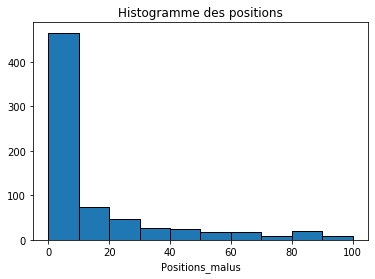

In [281]:
res_malus = pd.DataFrame(P_distance)
print(res_malus.describe())
print('quantile a 66', res_malus.quantile(0.66))
plt.xlabel('Positions_malus')
plt.title('Histogramme des positions')
plt.hist(P_distance, range=(0,100), bins= 10, edgecolor = 'black' )

                 0
count   1000.00000
mean     712.96700
std     3410.60379
min        1.00000
25%        1.00000
50%        3.00000
75%       27.00000
max    43225.00000
quantile a 66 0    11.0
Name: 0.66, dtype: float64


(array([644.,  83.,  31.,  21.,  13.,  13.,   7.,   7.,   4.,   2.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

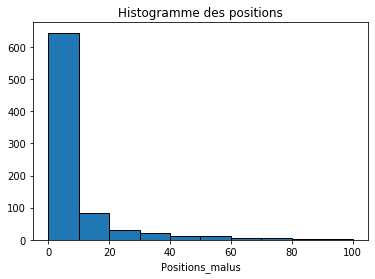

In [280]:
res_malus = pd.DataFrame(P_malus)
print(res_malus.describe())
print('quantile a 66', res_malus.quantile(0.66))
plt.xlabel('Positions_malus')
plt.title('Histogramme des positions')
plt.hist(P_malus, range=(0,100), bins= 10, edgecolor = 'black' )

# Resultat malus position 


In [213]:

P_malus_position=[]

    
for i in tqdm_notebook(L1):
    L=best_images_malus_position(i,liste_score4,liste_score4_d)
    

   
    if  L != [] :
                
        position = -20
        posi = 0
        for tup in L : 
            posi += 1
            if ev_match(df_depeche.event[i],df2.event[tup[0]]):
                position = posi 
                break
        P_malus_position.append(position)


/Users/ya/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


                  0
count   1000.000000
mean     711.341000
std     3409.874726
min        1.000000
25%        1.000000
50%        2.000000
75%       24.000000
max    43225.000000
quantile a 66 0    10.0
Name: 0.66, dtype: float64


(array([656.,  82.,  24.,  20.,  15.,   6.,  11.,   9.,   1.,   4.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

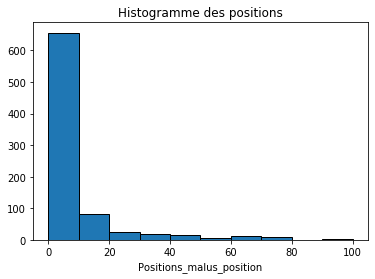

In [284]:
res_malus_position = pd.DataFrame(P_malus_position)
print(res_malus_position.describe())
print('quantile a 66', res_malus_position.quantile(0.66))

plt.xlabel('Positions_malus_position')
plt.title('Histogramme des positions')
plt.hist(P_malus_position, range=(0,100), bins= 10, edgecolor = 'black' )

# Resultat malus position 2 

/Users/ya/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """



                  0
count   1000.000000
mean     712.154000
std     3410.781483
min        1.000000
25%        1.000000
50%        3.000000
75%       24.000000
max    43225.000000
quantile a 66 0    10.0
Name: 0.66, dtype: float64


(array([794.,  35.,  16.,  12.,  13.,  11.,   3.,   8.,   3.,   1.]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <a list of 10 Patch objects>)

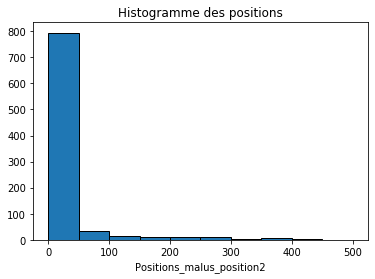

In [276]:

P_malus_position2=[]

    
for i in tqdm_notebook(L1):
    L=best_images_malus_position2(i,liste_score4,liste_score4_d)
    

   
    if  L != [] :
                
        position = -20
        posi = 0
        for tup in L : 
            posi += 1
            if ev_match(df_depeche.event[i],df2.event[tup[0]]):
                position = posi 
                break
        P_malus_position2.append(position)


                  0
count   1000.000000
mean     712.154000
std     3410.781483
min        1.000000
25%        1.000000
50%        3.000000
75%       24.000000
max    43225.000000
quantile a 66 0    10.0
Name: 0.66, dtype: float64


(array([656.,  77.,  32.,  16.,  13.,  13.,  10.,   5.,   3.,   5.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

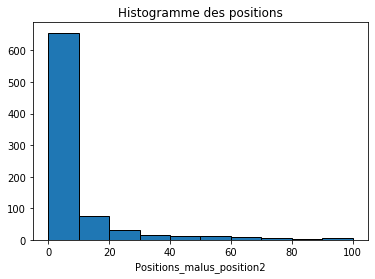

In [285]:
res_malus_position2 = pd.DataFrame(P_malus_position2)
print(res_malus_position2.describe())
print('quantile a 66', res_malus_position2.quantile(0.66))

plt.xlabel('Positions_malus_position2')
plt.title('Histogramme des positions')
plt.hist(P_malus_position2, range=(0,100), bins= 10, edgecolor = 'black' )

# Resultat scalaire


In [216]:

P_scalaire=[]

    
count=[0 for k in range(2)]
for i in tqdm_notebook(L1):
    L=best_images_scalaire(i,liste_score4,liste_score4_d)
    

   
    if  L != [] :
                
        position = -20
        posi = 0
        for tup in L : 
            posi += 1
            if ev_match(df_depeche.event[i],df2.event[tup[0]]):
                position = posi 
                break
        P_scalaire.append(position)

        


/Users/ya/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


                  0
count   1000.000000
mean     730.827000
std     3407.016504
min        1.000000
25%        1.000000
50%        3.000000
75%       49.000000
max    43225.000000
quantile a 66 0    15.0
Name: 0.66, dtype: float64


(array([620.,  65.,  26.,  22.,  18.,  15.,  12.,  12.,   6.,   8.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

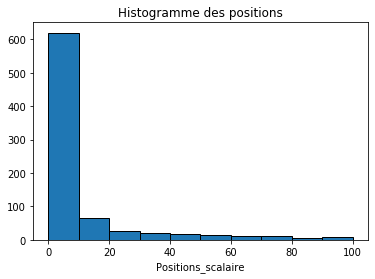

In [266]:

res_scalaire = pd.DataFrame(P_scalaire)
print(res_scalaire.describe())
print('quantile a 66', res_scalaire.quantile(0.66))

plt.xlabel('Positions_scalaire')
plt.title('Histogramme des positions')
plt.hist(P_scalaire, range=(0,100), bins= 10, edgecolor = 'black' )

# Resultat scalaire malus position et malus 

In [275]:

P_scalaire_malus=[]
P_scalaire_position = []

for i in tqdm_notebook(L1[:500]):
    L = best_images_scalaire(i,liste_score4,liste_score4_d, malus= True)
    L_p = best_images_scalaire(i,liste_score4,liste_score4_d, position= True)
    

   
    if  L != [] :
                
        position = -20
        posi = 0
        for tup in L : 
            posi += 1
            if ev_match(df_depeche.event[i],df2.event[tup[0]]):
                position = posi 
                break
        P_scalaire_malus.append(position)
    

    if  L_p != [] :
                
        position_scalaire_position = -20
        posi = 0
        for tup in L : 
            posi += 1
            if ev_match(df_depeche.event[i],df2.event[tup[0]]):
                position_scalaire_position = posi 
                break
        P_scalaire_position.append(position_scalaire_position)

/Users/ya/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [290]:
P_scalaire_malus

[]

In [287]:

res_scalaire_malus = pd.DataFrame(P_scalaire_malus)
print(res_scalaire_malus.describe())
print('quantile a 66', res_scalaire_malus.quantile(0.66))

plt.xlabel('Positions_scalaire_malus')
plt.title('Histogramme des positions')
plt.hist(P_scalaire_malus, range=(0,100), bins= 10, edgecolor = 'black' )

ValueError: Cannot describe a DataFrame without columns

                  0
count    500.000000
mean     693.234000
std     3413.496008
min        1.000000
25%        1.000000
50%        3.000000
75%       35.000000
max    43225.000000
quantile a 66 0    10.0
Name: 0.66, dtype: float64


(array([326.,  30.,  10.,  12.,   9.,   6.,   6.,   4.,   4.,   2.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

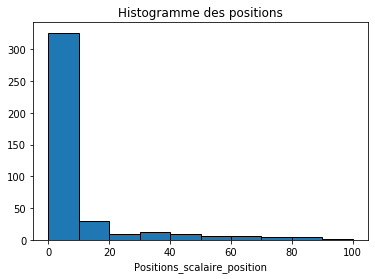

In [291]:

res_scalaire_position = pd.DataFrame(P_scalaire_position)
print(res_scalaire_position.describe())
print('quantile a 66', res_scalaire_position.quantile(0.66))

plt.xlabel('Positions_scalaire_position')
plt.title('Histogramme des positions')
plt.hist(P_scalaire_position, range=(00,100), bins= 10, edgecolor = 'black' )

# Resultat naif


In [223]:

P=[]

for i in tqdm_notebook(L1):
    L=best_images(i,liste_score4,liste_score4_d)
    

   
    if  L != [] :
                
        position = -20
        posi = 0
        for tup in L : 
            posi += 1
            if ev_match(df_depeche.event[i],df2.event[tup[0]]):
                position = posi 
                break
        P.append(position)


/Users/ya/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


0    10.0
Name: 0.66, dtype: float64

                  0
count   1000.000000
mean     706.756000
std     3406.922868
min        1.000000
25%        1.000000
50%        2.000000
75%       23.250000
max    43225.000000
quantile a 66  9.0


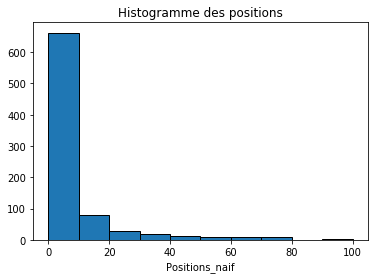

In [292]:
res = pd.DataFrame(P)
print(res.describe())
plt.xlabel('Positions_naif')
plt.title('Histogramme des positions')
plt.hist(P, range=(0,100), bins= 10, edgecolor = 'black' )
print("quantile a 66 " , res.quantile(0.66)[0])

In [101]:
%%time 
df2.reset_index(drop=True,inplace=True)
df_depeche.reset_index(drop=True,inplace=True)

L=[]
for k in range(300):
    l=np.random.randint(0,len(df_depeche))
    while l in L:
        l=np.random.randint(0,len(df_depeche))
    L.append(l)
    
count=[0 for k in range(2)]
for i in tqdm_notebook(L):
    a2=best5_image_test(i,liste_score4,liste_score4_d)
    
    
    a4=best5_image_test_scalaire(i,liste_score4,liste_score4_d)
    
    for tup in a2:
        if ev_match(df_depeche.event[i],df2.event[tup[0]]):
            count[0]+=1
            break
  
    for tup in a4:
        if ev_match(df_depeche.event[i],df2.event[tup[0]]):
            count[1]+=1
            break

count

/Users/ya/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


[189, 178]

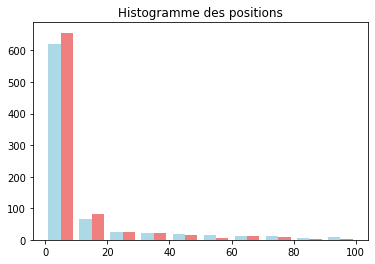

In [310]:
plt.title('Histogramme des positions')
plt.hist([P_scalaire, P_malus_position], range=(0,100), bins=10, color = ['lightblue','lightcoral'], label='score naïf')

plt.show()

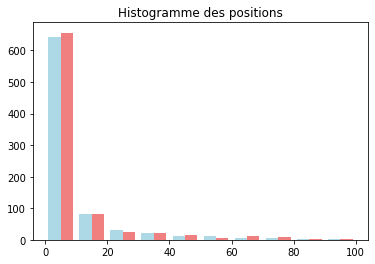

In [308]:
plt.title('Histogramme des positions')
plt.hist([P_malus, P_malus_position], range=(0,100), bins=10, color = ['lightblue','lightcoral'], label='score naïf')

plt.show()

In [ ]:
plt.title('Histogramme des positions')
plt.hist([P, P_malus_position], range=(0,100), bins=10, color = ['lightblue','lightcoral'], label='score naïf')

plt.show()

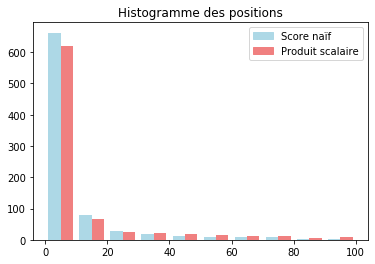

In [306]:
red_patch = mpatches.Patch(color='lightblue', label='Score naïf')
light_coral = mpatches.Patch(color='lightcoral', label='Produit scalaire')
plt.legend(handles=[red_patch,light_coral])

plt.title('Histogramme des positions')
plt.hist([P, P_scalaire], range=(0,100), bins=10, color = ['lightblue','lightcoral'], label='score naïf')
plt.show()

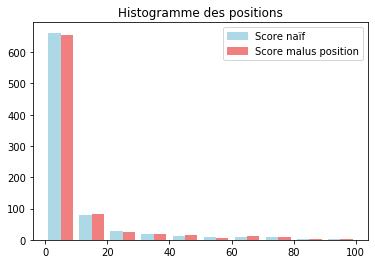

In [305]:
red_patch = mpatches.Patch(color='lightblue', label='Score naïf')
light_coral = mpatches.Patch(color='lightcoral', label='Score malus position')
plt.legend(handles=[red_patch,light_coral])

plt.title('Histogramme des positions')
plt.hist([P, P_malus_position], range=(0,100), bins=10, color = ['lightblue','lightcoral'], label='score naïf')
plt.show()

In [324]:
c1,c2 = 0,0 
a=20
for k in range(500):
    if P_scalaire_position[k]<=a:
        c1+=1
    if P_malus_position[k]<=a:
        c2+=1
print(c1,c2)

357 375


In [322]:
len(P_scalaire_position)

500

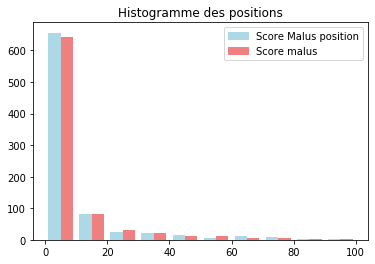

In [328]:
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='lightblue', label='Score Malus position')
light_coral = mpatches.Patch(color='lightcoral', label='Score malus')
plt.legend(handles=[red_patch,light_coral])
plt.title('Histogramme des positions')
plt.hist([P_malus_position, P_malus], range=(0,100), bins=10, color = ['lightblue','lightcoral'], label='score naïf')
plt.show()

In [208]:
def dep_ent(ent, doc):
    """ Retourne la fonction grammaticale :  la 'dep', d'une entité. Cette fonction est nécessaire car elle permet d'affecter
    une dep à une entité composée de plusieurs mots ayant chacun une dep de base.
    Traite aussi le cas particulier des mots étant des conj ou des compound : leur vrai dep et celle du mot auxquels
    ils sont associés en tant que conj ou compound."""
    start= ent.start
    end=ent.end
    for k in range(start,end):
        if doc[k].head.text not in ent.text: 
            if doc[k].dep_=='conj':     
                tok=doc[k]            
                while tok.dep_=='conj':
                    tok=tok.head      
                return(tok.dep_)
            
            if doc[k].dep_=='compound':   
                tok=doc[k]            
                while tok.dep_=='compound':
                    tok=tok.head      
                return(tok.dep_)
            return(doc[k].dep_)    
    return doc[start].dep_

## RAJOUT DE FAC
def ent_good_type(ent): #filtre les entités selon leur type 
    return (ent.label_ == "PERSON"or ent.label_ == "NORP" or ent.label_ == "ORG" or ent.label_ == "GPE" or ent.label_ == "EVENT" or ent.label_ == "LOC" or ent.label_ == "FAC")

def sort_ent(doc):
    """Retourne la liste des entités en les filtrant selon leur type et en les triant de manière à avoir au début de
    la liste les entités ayant des coréférences."""
    ent_coref=[ent for ent in doc.ents if ent._.is_coref and ent_good_type(ent)]
    ent_vanilla=[ent for ent in doc.ents if ent_good_type(ent) and not ent._.is_coref]
    return ent_coref + ent_vanilla

def scores_doc(doc):
    """Retourne le score de chaque entité pour la méthode sans neuralcoref."""
    res={}
    for ent in doc.ents:
        if ent.text not in res.keys():
            res[ent.text]=dict_val[dep_ent(ent,doc)]
        else:
            res[ent.text]+=dict_val[dep_ent(ent,doc)]
    return res

def scores_doc_coref1(doc):
    """Retourne le score de chaque entité pour la méthode de base opérée sur le document resolved.
    Le document resolved est le document de base dans lequel toutes les références à un groupe de mot sont remplacées
    par celui-ci.
    Par exemple : My dad is home. He watches TV devient My dad is home. My dad watches TV.
    En raisonnant avec le nlp sur le document resolved, le nlp va détecter beaucoup plus de fois la même entité.
    Le principal inconvénient est que toutes les références sont remplacées, y compris celles qui ne sont pas associées 
    à des entités mais plutôt à des très longs bouts de phrase qui sont repris par un pronom comme "it"  """
    
    doc=nlp(doc._.coref_resolved)
    res={}
    for ent in doc.ents:
        if ent_good_type(ent):
            if ent.text not in res.keys():
                res[ent.text]=dict_val[dep_ent(ent,doc)]
            else:
                res[ent.text]+=dict_val[dep_ent(ent,doc)]
    #normaliser_dict
    m=0
    if len(res) != 0 :
        m = max(res.values())
    if m >0 : # Possible que m =0 si description en Francais...
        for k in res.keys():
            res[k] /= m 

    return res

def is_in_cluster(ent,cluster):  #détermine si une entité est dans une des mentions d'un cluster
    for span in cluster.mentions:
        if ent.text in span.text:
            return True
    return False



def freq_dict(L):
    n = len(L)
    L_unique = list(set(L))
    d = {}
    for a in L_unique:
        for b in L:
            if a == b:
                if a in d.keys():
                    d[a] += 1/n
                else:
                    d[a] = 1/n
    return(d)

In [209]:
base_ar = pd.read_csv('base_articles.csv')

In [16]:
base_ar.Article[1]

'The 26-year old tech worker spent the last year jumping from one startup to another in what already felt like a precarious job market . But when he was laid off again in January, this time from a Beijing-based internet company, he never expected things to become as difficult as they are\n\nLast year "already felt like living in a hell mode," Wang told CNN Business in a telephone interview. "But 2020 is even worse. The coronavirus is like a head-on blow."\n\nWang is not his full name. He asked CNN Business to not use his entire name because he didn\'t want friends or family to know the details of his unemployment — a fear echoed by others in China who spoke about losing their jobs. Some also voiced concerns that making their personal predicament public could hurt their chances of finding work.\n\nThe pandemic all but shut down China for several weeks this year, wreaking havoc on the world\'s second largest economy and forcing millions of people out of work.\n\nThe full scale of how man

In [210]:
%%time 


def article_best_images(article, malus):
    """ Retourne les  meilleures ( best score) photos de la k eme dépèche"""
    doc = nlp(article)
    #doc = nlp(depeches.news2[10])
    L_score =[]
    score_doc=scores_doc_coref1(doc)
    #rel = related_descr(doc)
    if malus : 
        for j in range(len(liste_score4)):
            L_score.append( (score_sim_malus_position(score_doc,liste_score4,j),j)) 
    else : 
         for j in range(len(liste_score4)):
            L_score.append( (score_sim(score_doc,liste_score4,j),j)) 
    L_score.sort(reverse=True)
    
    return L_score


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 17.2 µs


In [51]:
d = article_best_images(base_ar.Article[1],True)

In [81]:
d.sort(key= lambda x : x[1])
d[-1]

(-0.6219465733112316, 49548)

In [69]:
df

NameError: name 'ind' is not defined

In [133]:
L1,L2

([(0, 49548),
  (0, 49547),
  (0, 49546),
  (0, 49545),
  (0, 49544),
  (0, 49543),
  (0, 49542),
  (0, 49541),
  (0, 49540),
  (0, 49539)],
 [(0, 39669),
  (0, 29422),
  (-0.5961632439130233, 49548),
  (-0.5961632439130233, 49547),
  (-0.5961632439130233, 49546),
  (-0.5961632439130233, 49545),
  (-0.5961632439130233, 49544),
  (-0.5961632439130233, 49543),
  (-0.5961632439130233, 49542),
  (-0.5961632439130233, 49541)])

In [272]:
base_ar.Article[33]

'London (CNN) The UK Parliament is expected on Thursday to approve plans that would see lawmakers hold the government to account via a video link, as the country\'s legislative chamber returns from its Easter recess on Monday.\n\nProposals for the so-called "virtual parliament" will allow Members of Parliament to question government ministers on their handling of the coronavirus pandemic, while also observing social distancing measures.\n\nHowever, the proposals only allow for limited parliamentary work to take place and are causing alarm among some that MPs will not be adequately capable of holding the government to account. Boris Johnson\'s Conservative government is facing serious criticism over its handling of the Covid-19 pandemic.\n\nThe move also comes as trust between the main opposition Labour Party and the Conservatives is particularly low, following four years of bitter divisions over Brexit.\n\nThe proposals will allow MPs to grill ministers on the government\'s coronavirus

In [30]:
article_best_images(base_ar.Article[1],False) == article_best_images(base_ar.Article[1],True)

False

In [211]:
c= []
for d in range(1,100):
    L1,L2 = article_best_images(base_ar.Article[d],False)[:10],article_best_images(base_ar.Article[d],True )[:10]
    for k in range(3):
        if  not (L1[k][1]==L2[k][1]):
            
            c.append(d)
            break
        
        
    
    
    
print(c)

[4, 22, 29, 33, 37, 39, 41, 62, 71, 74, 89, 95]


In [137]:
article_time= 'Jerusalem (CNN) The mourners gathered by the hundreds, packed tightly on to the evening streets of Bnei Brak. There was no social distancing -- no two meters between them -- as they made their way down the roads of this ultra-Orthodox town near Tel Aviv for the Saturday night funeral of Rabbi Tzvi Shenkar.\n\nDespite a police presence, the crowd mingled freely, apparently unconcerned about the government restrictions on large gatherings, or the reason behind them.\n\nAs Israel has battled the spread of coronavirus , the government has imposed increasingly tighter restrictions on the public in an attempt to slow the rate of infection. As of Tuesday morning, Israel had 4,831 confirmed cases of coronavirus and 17 deaths as a result of the disease.\n\nThough police say the majority of the public has heeded the instructions, the seriousness of the situation seems yet to have fully penetrated the ultra-Orthodox community.\n\nMore than a week earlier, an ultra-Orthodox wedding in Bet Shemesh near Jerusalem drew a crowd of 150, police said, in violation of government restrictions which limited weddings to ten people. One of those in attendance was supposed to be in quarantine, police said. He was one of three people arrested for endangering public health.\n\n"With the ultra-religious communities, we are definitely emphasizing police units being inside and dispersing people," said police spokesman Micky Rosenfeld. "We\'re seeing gatherings of more than ten people which is against the law," Rosenfeld said, emphasizing instances of religious schools that have remained open, despite orders to close.\n\nIn the ongoing fight against coronavirus, the ultra-Orthodox communities have become the front line. Police officers and SWAT teams have gone into these neighborhoods, warning people of the new restrictions on public gathering and issuing tickets to those who ignore the rules. But too often, the Haredim view civil laws and restrictions as an intrusion into their conservative, strictly religious, lifestyle.\n\nIn Mea Shearim, video from Israel police showed officers showered with cries of "Nazis" and "murderers" as they made their way down the labyrinthine alleys of the insular Jerusalem neighborhood. A medical team from Magen David Adom (MDA), Israel\'s emergency response service, was pelted with rocks in the same neighborhood while trying to carry out a coronavirus test, a spokesman from MDA said.\n\nIsraeli security forces arrest an ultra-Orthodox Jewish man as they close a synagogue in Jerusalem on Monday.\n\nInfection rates in ultra-Orthodox communities are markedly higher than the rest of the country. The ultra-Orthodox communities in Bnei Brak, Mea Shearim, and Kiryat Yearim, which lies between Jerusalem and Tel Aviv, have among the highest infection rates in Israel, Rosenfeld said. A spokesman for the mayor of Bnei Brak said health officials had confirmed the town had the single highest infection rate in the entire country.\n\nIsrael\'s ultra-Orthodox, also known as the Haredim, make up just 14% of the country\'s total population but comprises a disproportionately large number of coronavirus patients. At Tel Hashomer hospital outside Tel Aviv, 60% of the coronavirus patients are ultra-Orthodox, spokesman Steve Walz tells CNN\n\nHaredi communities routinely shun modern technology like internet and smart phones. Despite a gradual modernization movement, the community still relies on posters and signs plastered on street corners to spread important messages and news. On one corner in Mea Shearim, a sign implores the community to heed the government\'s instructions, saying, "Danger! Responsibility Demands," and explains who need to enter self-quarantine. But the sign was ripped apart, with the middle section torn out.\n\nA number of signs nearby shared a very different message about a "Terrible Discovery" that the "Corona Epidemic = A Lack of Modesty." The poster implored women and girls to dress modestly and adhere to religion according to the demands of Jewish law.\n\nA poster with instructions on how to properly sneeze in Jerusalem on Sunday.\n\nDespite outward appearances, the ultra-Orthodox community is not homogenous. Instead it is divided into many different factions and groups, each with its own rabbis and leaders. A directive from one rabbi may not hold sway over the followers of a different rabbi. Some of the groups are defiantly opposed to the existence of the state of Israel, believing it makes less likely the arrival of the Messiah. One of the most radical is known as the Jerusalem faction, which regularly organizes protests against the Israeli government. Police say it was this group that held the funeral in Bnei Brak over the weekend.\n\nEven so, some leading ultra-Orthodox rabbis have begun to instruct their followers to obey government restrictions. Rabbi Chaim Kanievsky, one of the most prominent Haredi religious leaders, warned on religious media outlets that anyone who doesn\'t obey the instructions of the Ministry of Health should be turned over to police.\n\nIn an extraordinary move, he even allowed ultra-Orthodox Jews to answer their phone on the Sabbath -- when use of technology and electricity are strictly forbidden -- if they\'re expecting results of a coronavirus test. Kanievsky\'s intervention was all the more remarkable because in an earlier announcement about the virus he had told his followers to continue their communal study of the Torah, in direct contradiction to government instructions.\n\nJews attended a special prayer last Wednesday at the Western Wall for the end of the coronavirus pandemic while keeping a distance of two meters from one another.\n\nThe mayor of Bnei Brak, Avraham Rubinstein also warned the ultra-Orthodox community in no uncertain terms to "Wake Up!" in a recorded message that went out to residents via telephone. Rubinstein himself is under quarantine from the spread of coronavirus within Bnei Brak.\n\nThe phone call itself provides an illustration of one of the most difficult aspects of disseminating a message to the Haredi community -- when an entire population shuns the internet, smart phones and other modern means of communication, spreading urgent news and the latest directives is incredibly challenging.\n\n"Inside these religious communities, they are not online and they are not using communicative systems, such as smart phone and televisions," said Micky Rosenfeld. "They don\'t exist inside these neighborhoods."\n\nMayor Rubinstein followed up his recorded warning with an interview Monday morning on a Haredi radio station, saying "Bnei Brak has done, is doing, and will do, everything to prevent people gathering and to do everything the Ministry of Health instructs." But he acknowledged the town had little power to close private religious institutions that refused to comply.\n\n"We\'re in a war," Moti Ravid, head of the Mayanei Hayeshua hospital in Bnei Brak, told public broadcaster Kan on Sunday. "I warned a month ago that there would be a catastrophe in the city if they did not stop the gatherings and close the synagogues and the yeshivas, and everyone yelled at me, \'How dare you?\'"\n\n"Today, they say, \'It\'s a pity we didn\'t listen to you then.\'"\n\nIn the face of an epidemic that is decidedly worse in one specific community, the government has contemplated quarantining the ultra-Orthodox neighborhoods.\n\nOn Army Radio Sunday morning, Ministry of Health Director-General Moshe Bar Siman Tov said officials were looking into the possibility. "We are checking this," said Siman Tov. "If we get to the conclusion that this will be an effective step, we will recommend it."'
article_time = article_time.replace("\n"," ")
b,n = article_best_images(article_time,False)[:20],article_best_images(article_time,True )[:20]

In [273]:
d=33
L1,L2 = article_best_images(base_ar.Article[d],False)[:10],article_best_images(base_ar.Article[d],True )[:10]


In [274]:
for k in range(10):
    print((L1[k][1]==L2[k][1]))
            
           

True
False
False
False
False
True
True
False
False
False


In [271]:
L2

[(0, 39669),
 (0, 29422),
 (-0.3611111111111111, 49548),
 (-0.3611111111111111, 49547),
 (-0.3611111111111111, 49546),
 (-0.3611111111111111, 49545),
 (-0.3611111111111111, 49544),
 (-0.3611111111111111, 49543),
 (-0.3611111111111111, 49542),
 (-0.3611111111111111, 49541)]

In [251]:
base_ar.Article[41]


'(CNN) The lineup for Sunday\'s "The Disney Family Singalong: Volume II" is looking rather magical.\n\nABC announced Wednesday that John Legend , Katy Perry, Tituss Burgess, Sabrina Carpenter, Jennifer Hudson , Lang Lang and more stars have been added to the roster for the next edition of the TV event, which is set to air Sunday at 7 p.m. ET on ABC\n\nThe first "Disney Family Singalong," which aired last month, notched more than 10 million viewers and featured a buzzy surprise appearance by Beyoncé.\n\nPreviously announced performers for the second installment include Chloe x Halle, Billy Eichner, Donald Glover, Idina Menzel, Miguel, and Shakira.\n\nChristina Aguilera, Josh Gad, Derek Hough and Julianne Hough are set to make return appearances.\n\nRead More'

In [275]:
scores_doc_coref1(nlp(base_ar.Article[d]))

{'London': 0.12686567159860215,
 'CNN': 0.15298507472436787,
 'The UK Parliament': 0.17164179101729227,
 'UK': 0.51492537322725,
 'Parliament Easter': 0.14552238806689966,
 'Parliament': 1.0,
 'Labour Party': 0.2910447761337993,
 'Conservatives': 0.14552238806689966,
 'Brexit': 0.14552238806689966,
 'the House of Commons': 0.3694029851603503,
 'Parliamentary': 0.3283582090703943,
 'MPs, Hoyle': 0.14552238806689966,
 'Estate': 0.14552238806689966,
 'Hoyle': 0.1753731343460264,
 'Louisiana': 0.3507462686920528,
 'US': 0.2910447761337993,
 'Chris Bryant': 0.1753731343460264,
 'the Labour Party': 0.14552238806689966,
 'Tom Tugendhat': 0.1753731343460264,
 'the Parliamentary Foreign Affairs Select Committee': 0.14552238806689966,
 'Westminster': 0.320895522412926,
 'Scotland': 0.14552238806689966,
 'Ireland': 0.14552238806689966,
 'Germany': 0.14552238806689966,
 'Australia': 0.14552238806689966,
 'European': 0.08582089550864613,
 'British': 0.08582089550864613,
 'Jacob Rees-Mogg': 0.082089

In [276]:
L1,L2

([(4.056559309616167, 20492),
  (4.02670856333704, 20523),
  (3.9033848616177993, 21322),
  (3.8283582103117078, 7031),
  (3.6962686570481833, 21323),
  (3.6688138265209735, 20485),
  (3.565059319095018, 20318),
  (3.525007939241048, 9982),
  (3.525007939241048, 9981),
  (3.5069296372659546, 6438)],
 [(3.6444790750553837, 20492),
  (3.621950145068142, 21322),
  (3.6098451655109507, 20523),
  (3.399208940498526, 21323),
  (3.345715491497964, 7031),
  (3.251950428694884, 20485),
  (3.1364771712689286, 20318),
  (3.0242869184522108, 6438),
  (3.0242869184522108, 6432),
  (2.9992089406431415, 20789)])

In [188]:
clean = pd.read_csv("photos_clean.csv")

/Users/ya/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (11,16,24,25,30,31,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [268]:
scores_doc_coref1(nlp(clean.caption[L2[1][1]]))

{'Maren': 0.7361963189954083,
 'Ricardo Chamorro': 0.7361963189954083,
 'L-R': 0.20858895698622454,
 'Johanna': 0.23926380369513345,
 'Johan': 1.0,
 'Thomas': 0.5276073620091837,
 'Henry': 0.13496932505784937,
 'AFP': 0.23926380369513345,
 'McLean': 0.23926380369513345,
 'Virginia': 0.13496932505784937,
 'Michael Keller': 0.23926380369513345,
 "Children's National Hospital": 0.11042944774839096,
 'Washington': 0.23926380369513345,
 'DC': 0.13496932505784937,
 'Keller': 0.2883435583140502,
 "Ivan COURONNE '": 0.20858895698622454}

In [265]:
scores_doc_coref1(nlp(clean.caption[32655]))

{'New York': 1.0,
 'Bill de Blasio': 1.0,
 'US': 1.0,
 'Donald Trump': 1.0,
 'the New York City Veterans Day Parade': 0.8297872340000001,
 'AFP / Brendan Smialowski': 0.723404255}

In [180]:
c=0
for k in photos_treated.index == 11313:
    c+=1
    if k :
        print(c)
        break

5715


In [249]:
L2

[(1.4933416302594569, 9846),
 (1.469680790518636, 9231),
 (1.469680790518636, 9212),
 (1.4696113538818882, 38266),
 (1.4696113538818882, 38258),
 (1.4696113538818882, 38257),
 (1.4696113538818882, 38254),
 (1.4696113538818882, 6701),
 (1.4696113538818882, 6502),
 (1.4696113538818882, 6499)]

In [277]:
from IPython.display import Image
from IPython.core.display import HTML 
L = [ df2.url_extracted[k[1]] for k in L1[:10] ] 
for i in L :
    display(Image(url= i))
    

In [278]:
df2.reset_index(drop=True,inplace=True)

from IPython.display import Image
from IPython.core.display import HTML 
L = [ df2.url_extracted[k[1]] for k in L2[:10] ] 
for i in L :
    display(Image(url= i))